<a href="https://colab.research.google.com/github/kawthar-mohammed/Usecase-7/blob/main/EDA__Usecase_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [ ]:
# !pip install ydata-profiling


In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="player Profiling Report")

# profile.to_notebook_iframe()
# profile.to_file("player Profiling Report")

after generating profile report I undersatend that:

1-the current value of the player is highly correlated with the apperance,highest_value and minutes played.

2- assists and goals is highly correlated with each other.

3-goals conceded is highly overall correlated with clean sheets

4-games_injured is highly overall correlated with days_injured and highest_value.

### Data Quality Checks



#### 1. Reliability:
This dataset was generated by scraping data from Transfermarkt.

#### 2. Timeliness:
the dataset collectiog time is compatiable with spesified period.

#### 3. Consistency:



#### 4. Relevance:
the dataset sample is relevance with analysis opjective

#### 5. Uniqueness:
the dataset does not have duplicated values


#### 6. Completeness:
the datasset is complete

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 7. Check Accuracy
the data type for each columns is appropriate.

as I have low knowledge of football I will deal with outlier on the selected feature.

In [ ]:
# check outliers
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
#delete columns.
df.drop(columns = ['player', 'name'],inplace = True)

In [ ]:
df['position'].value_counts()

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [ ]:
df['team'].value_counts()

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [ ]:
df['position_encoded'].value_counts()
# we have position column that show same fact with more readable value

,count
position_encoded,
2,3528
3,3095
4,2902
1,1229


In [ ]:
df.drop(columns = ['position_encoded'],inplace = True)

In [ ]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger'],
      dtype='object')

In [ ]:

import plotly.express as px

cols_for_heatmap = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger']
df_heatmap = df[cols_for_heatmap]


fig = px.imshow(df_heatmap.corr(), color_continuous_scale='RdBu')
fig.update_xaxes(side="top")
fig.show()


'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded' is highly correlaed with current_value.

In [ ]:
#one hot encoding
df = pd.get_dummies(df, columns=['position','team'])

In [ ]:
df.shape


(10754, 407)

In [ ]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
                         ...   
position_Attack       -0.027709
position_midfield     -0.032972
age                   -0.050156
goals conceded        -0.063529
position_Goalkeeper   -0.077891
Name: current_value, Length: 407, dtype: float64


In [ ]:
# Set the correlation threshold
threshold = 0.0
# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=407)

In [ ]:
df = df[selected_features]
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,False,False,False,False,False,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,False
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,False,False,False,False,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(10754, 407)

In [ ]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=407)

In [ ]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


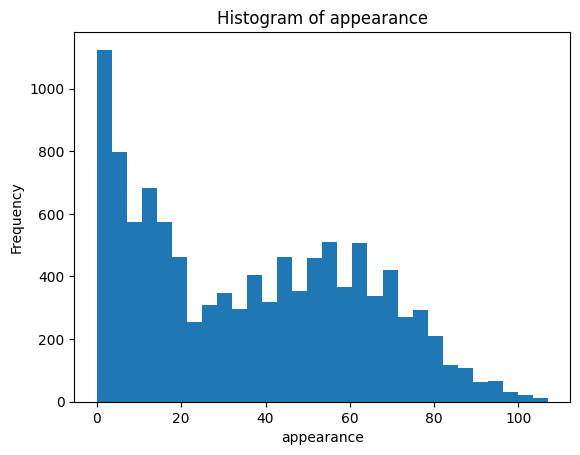

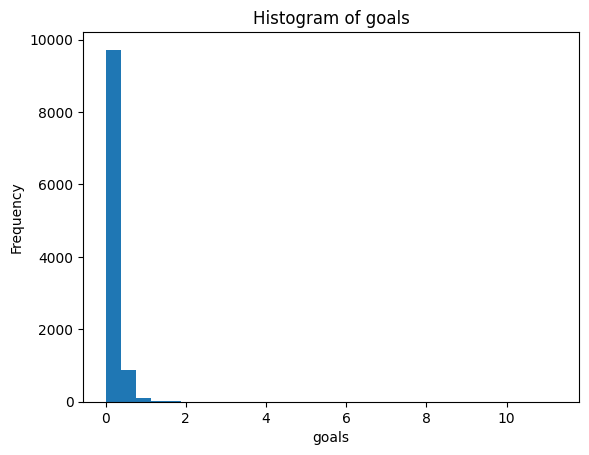

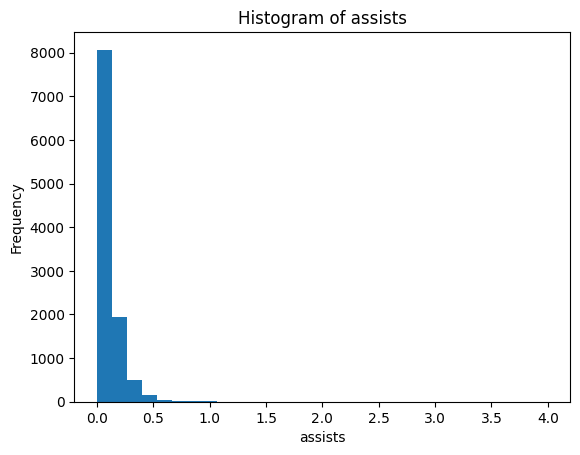

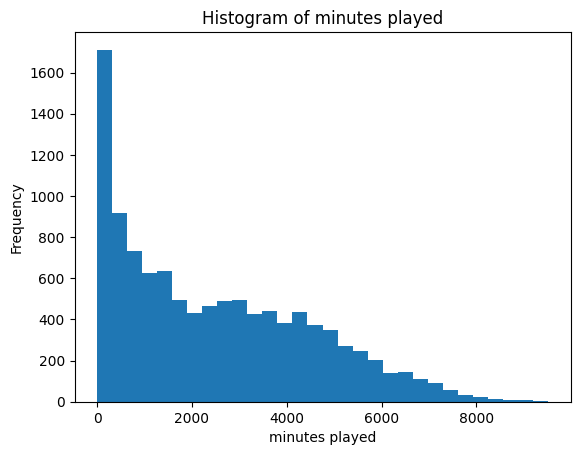

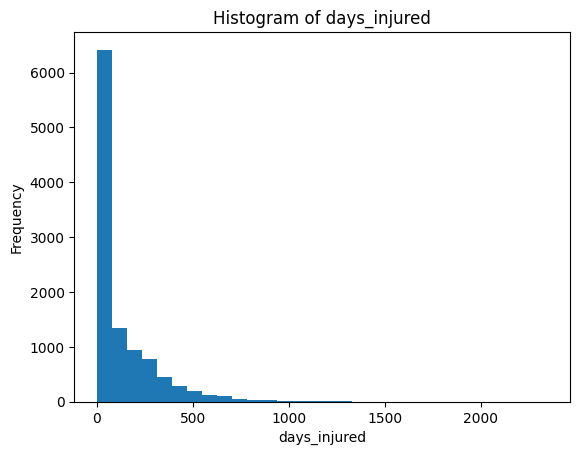

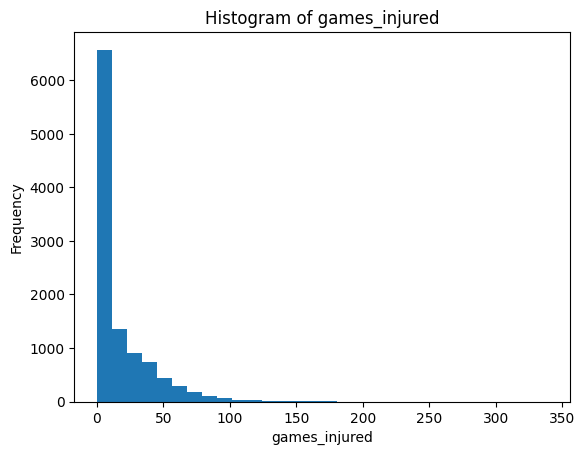

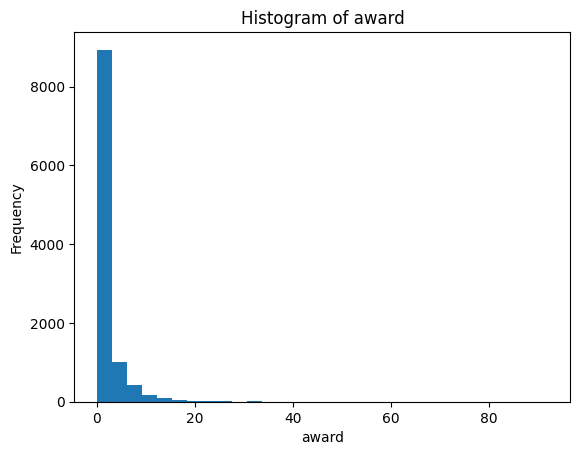

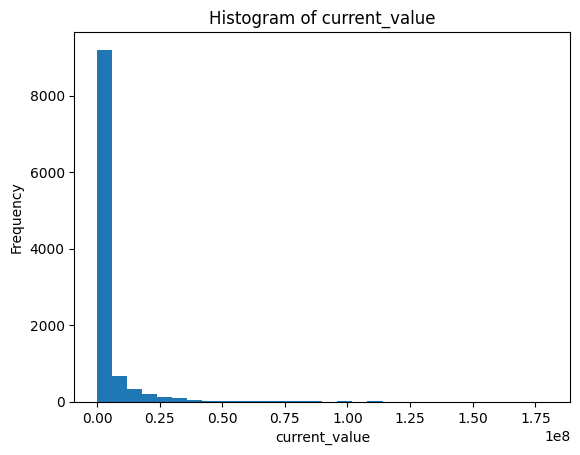

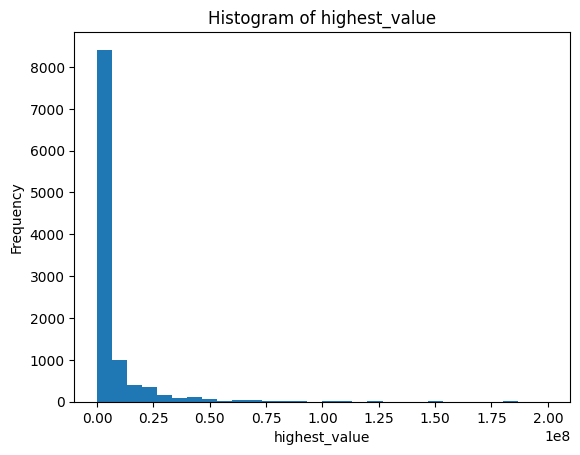

In [ ]:
# I need to see histogram for all the columns that showen in describe function:

columns_to_plot = ['appearance','goals','assists','minutes played','days_injured',
                   'games_injured','award','current_value','highest_value']
for column in columns_to_plot:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins = 30)
    plt.title(f'Histogram of {column}')  # Set a title for the histogram
    plt.xlabel(column)  # Set x label
    plt.ylabel('Frequency')  # Set y label
    plt.show()  # Show plot

In [ ]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=407)

In [ ]:
# Calculate z-scores for 'appearance'
df['zscore_appearance'] = np.abs(zscore(df['appearance']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_appearance'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_appearance', axis=1)


In [ ]:
df['zscore_assists'] = np.abs(zscore(df['assists']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_assists'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_assists', axis=1)

In [ ]:
df['zscore_goals'] = np.abs(zscore(df['goals']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_goals'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_goals', axis=1)

In [ ]:
df['zscore_minutes played'] = np.abs(zscore(df['minutes played']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_minutes played'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_minutes played', axis=1)

In [ ]:
df['zscore_days_injured'] = np.abs(zscore(df['days_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_days_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_days_injured', axis=1)

In [ ]:
df['zscore_games_injured'] = np.abs(zscore(df['games_injured']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_games_injured'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_games_injured', axis=1)

In [ ]:
df['zscore_award'] = np.abs(zscore(df['award']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_award'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_award', axis=1)

In [ ]:
df['zscore_current_value'] = np.abs(zscore(df['current_value']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_current_value'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_current_value', axis=1)

In [ ]:
df['zscore_highest_value'] = np.abs(zscore(df['highest_value']))

# Remove outliers based on z-score threshold (e.g., z-score > 3)
threshold = 3
df = df[df['zscore_highest_value'] <= threshold]

# Drop the temporary z-score column
df = df.drop('zscore_highest_value', axis=1)

In [ ]:
# # because I do not have high knowledage of football Iwill consider values that are
# #grater than 97 percentile as outlier.

# df= df[df['appearance']<=df['appearance'].quantile(0.95)]
# df= df[df['goals']<=df['goals'].quantile(0.97)]
# df= df[df['assists']<=df['assists'].quantile(0.95)]
# df= df[df['minutes played']<=df['minutes played'].quantile(0.95)]
# df= df[df['days_injured']<=df['days_injured'].quantile(0.95)]
# df= df[df['games_injured']<=df['games_injured'].quantile(0.95)]
# df= df[df['award']<=df['award'].quantile(0.95)]
# df= df[df['current_value']<=df['current_value'].quantile(0.95)]
# df= df[df['highest_value']<=df['highest_value'].quantile(0.95)]

In [ ]:
df.shape

(9536, 407)

Prepare train and test data

In [ ]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR #Import the SVR class
from sklearn.model_selection import GridSearchCV
## This statement allows the visuals to render within your Jupyter Notebook

In [ ]:
X.shape

(9536, 406)

## Buliding the Model

In [ ]:
model = LinearRegression()

In [ ]:
ridge_model = Ridge()  # You can adjust alpha to see different results

In [ ]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [ ]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

## Train the Model

In [ ]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.673e+15, tolerance: 8.266e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning:

With alpha=0, this algorithm does not converge wel

Best Parameters for ridge model: {'alpha': 5}
Best Parameters for lasso model: {'alpha': 5}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+14, tolerance: 1.063e+13



## Test the Model

In [ ]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients


In [ ]:
coeff_df

,Coefficient
height,-17718.901459
age,-657340.179302
appearance,-350001.378559
goals,98057.258503
assists,81505.273074
...,...
team_Wolverhampton Wanderers,145417.557914
team_Yokohama F. Marinos,22888.157926
team_Yokohama FC,27447.447658
team_Zenit St. Petersburg,109068.165027


In [ ]:
coeff_df_ridge

,Coefficient
height,-17626.948923
age,-656636.291496
appearance,-335767.287736
goals,97660.168307
assists,81155.652714
...,...
team_Wolverhampton Wanderers,145567.432458
team_Yokohama F. Marinos,22855.493592
team_Yokohama FC,27464.669624
team_Zenit St. Petersburg,109082.684767


In [ ]:
coeff_df_lasso

,Coefficient
height,-17709.306735
age,-657319.794382
appearance,-350008.105751
goals,98032.469568
assists,81491.639146
...,...
team_Wolverhampton Wanderers,145287.891163
team_Yokohama F. Marinos,22704.582925
team_Yokohama FC,27245.917901
team_Zenit St. Petersburg,108924.644002


In [ ]:
print(f" Linear regression intercept: {model.intercept_}")

 Linear regression intercept: 2127373.492396435


In [ ]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}")

 Ridge model intercept: 2127373.492396435


In [ ]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}")

 Lasso model intercept: 2127373.492396435


## Evaluating the Model

In [ ]:
y_base = [y_train.mean()] * len(y_test)

In [ ]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.476178e+13


In [ ]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 2.883678e+12
Mean Squared Error for testing: 4.095159e+12


In [ ]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 2.883699e+12
Mean Squared Error for testing ridge model: 4.094493e+12


In [ ]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 2.883678e+12
Mean Squared Error for testing lasso model: 4.095116e+12


In [ ]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 2.355727e+06


In [ ]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.050356e+06
Mean Absolute Error for testing: 1.216319e+06


In [ ]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 1.049951e+06
Mean Absolute Error for testing ridge model: 1.215772e+06


In [ ]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 1.050340e+06
Mean Absolute Error for testing lasso model: 1.216294e+06


In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 3.842106e+06


In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 3.842106e+06


In [ ]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')


Root Mean Squared Error for training ridge model: 1.698146e+06
Root Mean Squared Error for testing ridge model: 2.023485e+06


In [ ]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 1.698140e+06
Root Mean Squared Error for testing lasso model: 2.023639e+06


In [ ]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7930877876460775
R Square for testing: 0.7222950000587955


In [ ]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.7930862878455573
R Square for testing ridge model: 0.7223401512380836


In [ ]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.7930877865623148
R Square for testing lasso model: 0.7222978690275673


In [ ]:
predictions = model.predict(X_test_scaled)
#predictions

In [ ]:
Real_Values = np.array(y_test)
# Real_Values

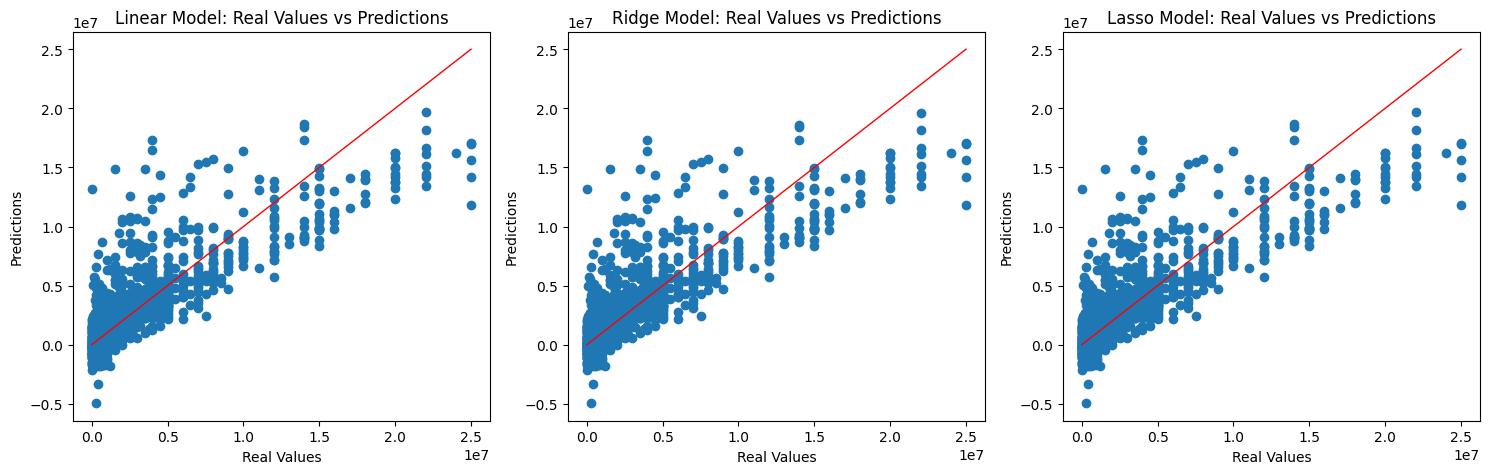

In [ ]:
# Linear Model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Model: Real Values vs Predictions')

# Ridge Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Ridge Model: Real Values vs Predictions')

# Lasso Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Lasso Model: Real Values vs Predictions')

plt.tight_layout()
plt.show()

<ipython-input-366-a5a556a84e05>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-366-a5a556a84e05>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-366-a5a556a84e05>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

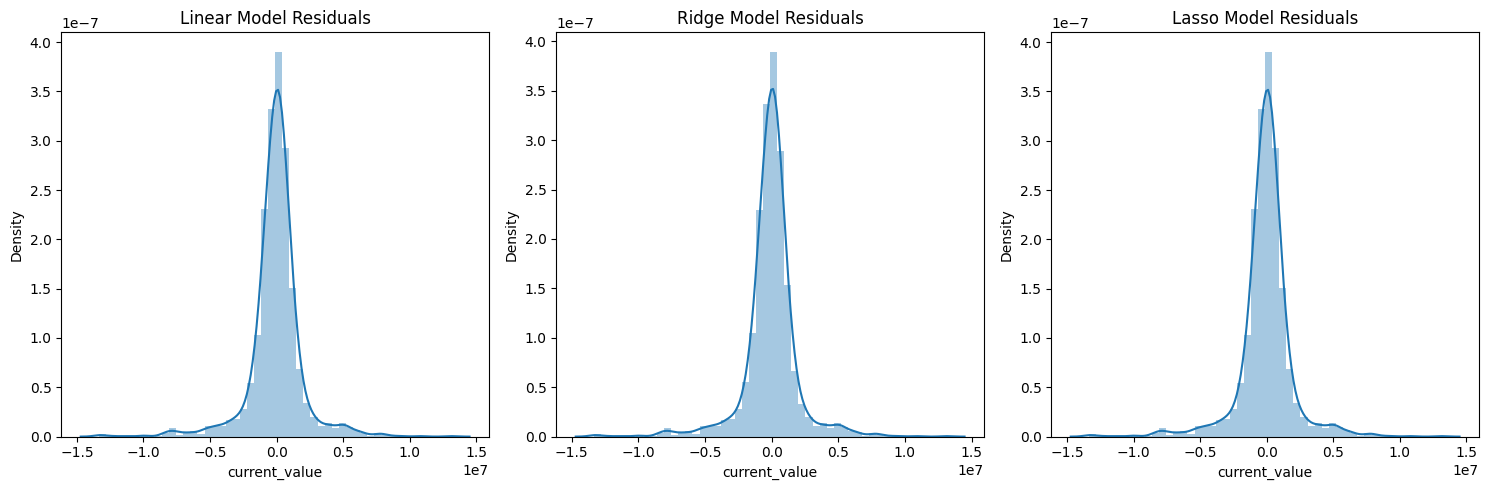

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.distplot((y_test - y_pred), bins=50)
plt.title('Linear Model Residuals')

plt.subplot(1, 3, 2)
sns.distplot((y_test - y_pred_ridge), bins=50)
plt.title('Ridge Model Residuals')

plt.subplot(1, 3, 3)
sns.distplot((y_test - y_pred_lasso), bins=50)
plt.title('Lasso Model Residuals')

plt.tight_layout()
plt.show()